# SMOTE Balancing of StandardScaler Data
## Load Packages

In [1]:
from imblearn.over_sampling import SMOTE
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import pickle
from datetime import datetime as dt
from pprint import pprint
import pandas as pd
import numpy as np

## Load Data

In [2]:
X_train, X_test, y_train, y_test = pickle.load( open( "../../pickles/intercorr_app2_StandardScaler_20210711_214851.pickle", "rb" ) )

#### Convert pandas dataframe to series

In [3]:
y_train = y_train.squeeze(axis=1)
y_test = y_test.squeeze(axis=1)

## Balance Data -- Oversampling with SMOTE

In [4]:
smt = SMOTE(random_state=78)
X_train_smt, y_train_smt=smt.fit_resample(X_train,y_train)

##  Check data distribution before and after balancing

<ipython-input-5-8eaad75a8d4a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
<ipython-input-5-8eaad75a8d4a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


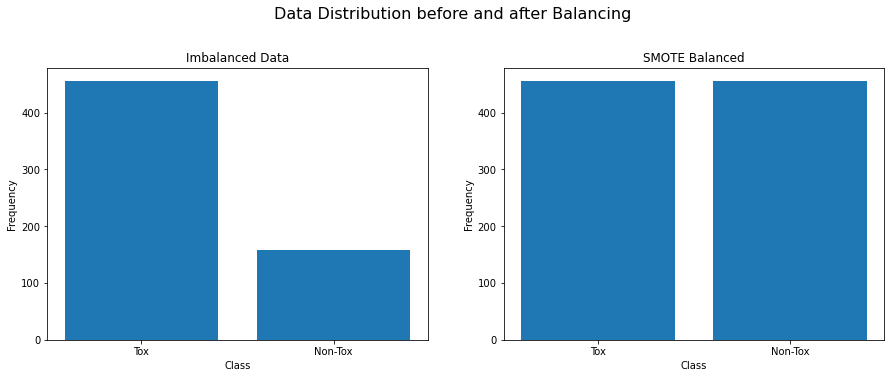

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plt.subplots_adjust(hspace = 0.5)

fig.suptitle('Data Distribution before and after Balancing', fontsize=16, y=1.05)

labels = ["Tox", "Non-Tox"]
count_classes1 = pd.value_counts(y_train, sort = True)
ax1.bar([0,1], count_classes1)
ax1.set_xticklabels(labels)
ax1.set_title("Imbalanced Data")
ax1.set_xticks(range(2))
ax1.set_xlabel("Class")
ax1.set_ylabel("Frequency")


LABELS = ["Tox", "Non-Tox"]
count_classes2 = pd.value_counts(y_train_smt, sort = True)
ax2.bar([0,1], count_classes2)
ax2.set_xticklabels(labels)
ax2.set_title("SMOTE Balanced")
ax2.set_xticks(range(2))
ax2.set_xlabel("Class")
ax2.set_ylabel("Frequency")

plt.show()

# ipython generates an error message, like: "UserWarning: FixedFormatter should only be used together with FixedLocator
#  ax1.set_xticklabels(labels)" -> bug


## Save Data

In [6]:
out = (X_train_smt, X_test, y_train_smt, y_test)
#timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = '../../pickles/intercorr_app2_StandardScaler_smote_20210711_214851.pickle' 
filehandler = open(filename, 'wb')
pickle.dump(out, filehandler)